Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w 0 + w1 *x. You need to

1) Plot the data (i.e., x-axis for the 1 st column, y-axis for the 2 nd column),

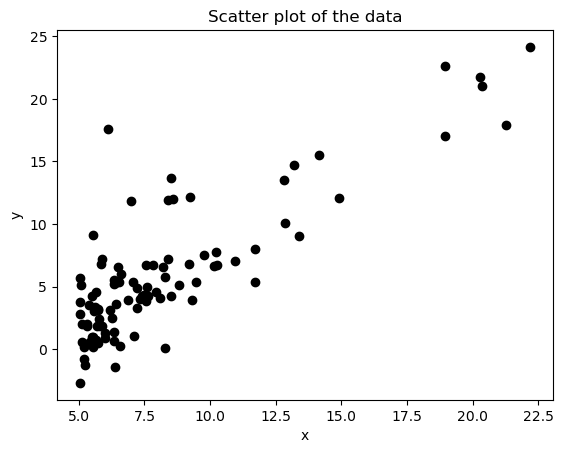

In [1]:
#Caliing important Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading the .txt file data
data = np.genfromtxt('data2.txt', delimiter=',')

# Extracting the x and y values
x = data[:, 0]
y = data[:, 1]

# Create the scatter plot
plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the data')
plt.show()

And use Python to implement the following methods to find the coefficients:

2) Normal equation

In [2]:
# Adding a bias term to the features
x = np.column_stack((np.ones_like(x), x))

# Computing the coefficients using the normal equation
coeff = np.dot(x.T, x)

a = np.linalg.inv(coeff)
b = np.dot(x.T, y)
theta = np.dot(a, b)

print("Coefficients (theta) :", theta)

Coefficients (theta) : [-3.89578088  1.19303364]


3) Gradient Descent using batch AND stochastic modes respectively:

   a) Split dataset into 80% for training and 20% for testing.

In [3]:
# Adding a bias term to the features
x = np.column_stack((np.ones_like(x), x))

# Splitting the dataset into training and testing sets (80% training, 20% testing)
split_ratio = 0.8
split_index = int(split_ratio * len(x))

x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Print the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (77, 4)
Shape of x_test: (20, 4)
Shape of y_train: (77,)
Shape of y_test: (20,)


b) Plot MSE vs. iteration of each mode for both training set and testing set (i.e., batch – training and testing; stochastic – training and testing). Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)

In [4]:
# Calculate_mse function to calculate MSE for both training and testing sets
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

def calculate_mse(theta, x, y):
    m = len(y)
    predictions = np.dot(x, theta)
    mse = np.sum((predictions - y) ** 2) / (2 * m)
    return mse

In [5]:
# Gradient_descent_batch function to calculate MSE for testing set
def gradient_descent_batch(x_train, y_train, x_test, y_test, theta, learning_rate, num_iterations):
    m = len(y_train)
    mse_history_train = []
    mse_history_test = []

    for i in range(num_iterations):
        predictions_train = np.dot(x_train, theta)
        error_train = predictions_train - y_train
        gradient_train = np.dot(x_train.T, error_train) / m
        theta -= learning_rate * gradient_train

        mse_train = calculate_mse(theta, x_train, y_train)
        mse_history_train.append(mse_train)

        # MSE for testing set
        mse_test = calculate_mse(theta, x_test, y_test)
        mse_history_test.append(mse_test)

    return theta, mse_history_train, mse_history_test

In [6]:
# Gradient_descent_stochastic function to calculate MSE for testing set
def gradient_descent_stochastic(x_train, y_train, x_test, y_test, theta, learning_rate, num_iterations):
    m = len(y_train)
    mse_history_train = []
    mse_history_test = []

    for i in range(num_iterations):
        for j in range(m):
            random_index = np.random.randint(0, m)
            x_random = x_train[random_index, :].reshape(1, -1)
            y_random = y_train[random_index]

            prediction = np.dot(x_random, theta)
            error = prediction - y_random
            gradient = np.dot(x_random.T, error)
            theta -= learning_rate * gradient

        # MSE for training set
        mse_train = calculate_mse(theta, x_train, y_train)
        mse_history_train.append(mse_train)

        # MSE for testing set
        mse_test = calculate_mse(theta, x_test, y_test)
        mse_history_test.append(mse_test)

    return theta, mse_history_train, mse_history_test

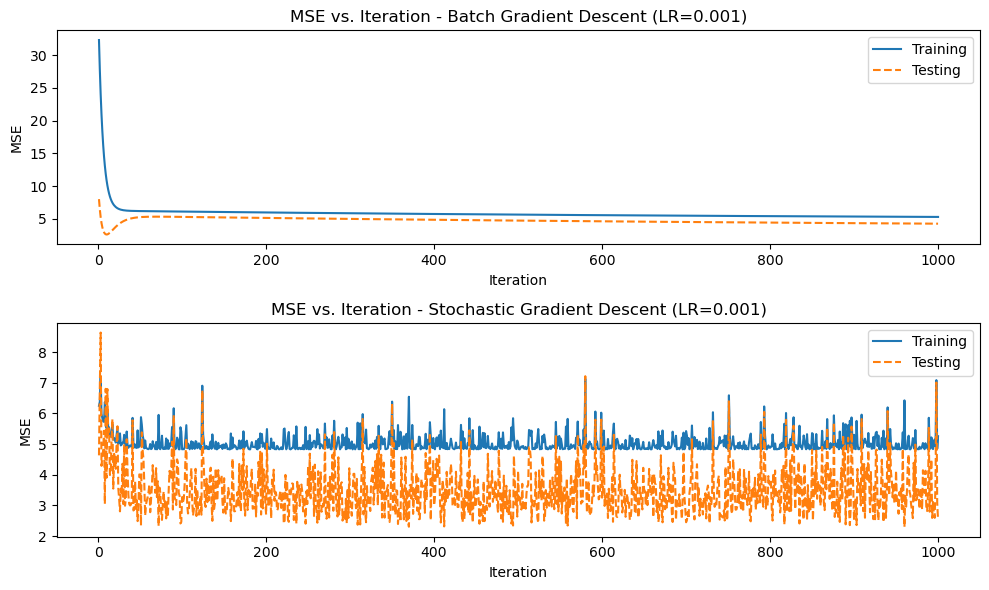

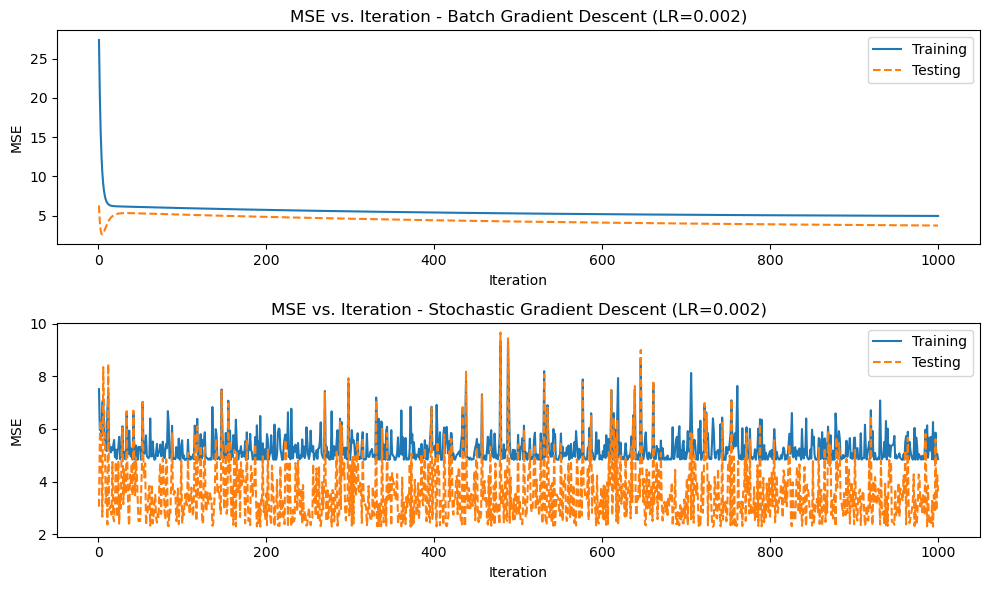

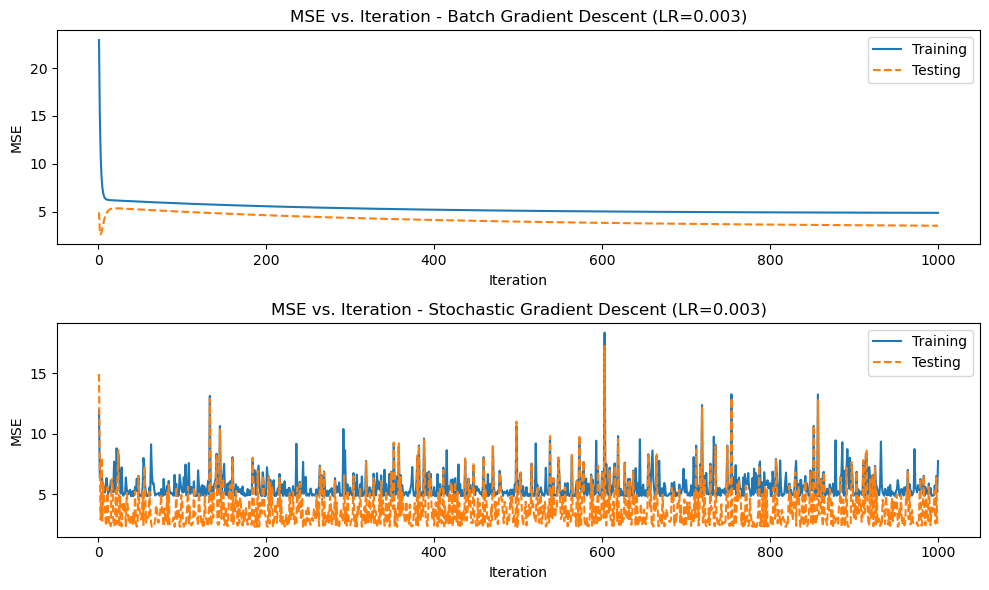

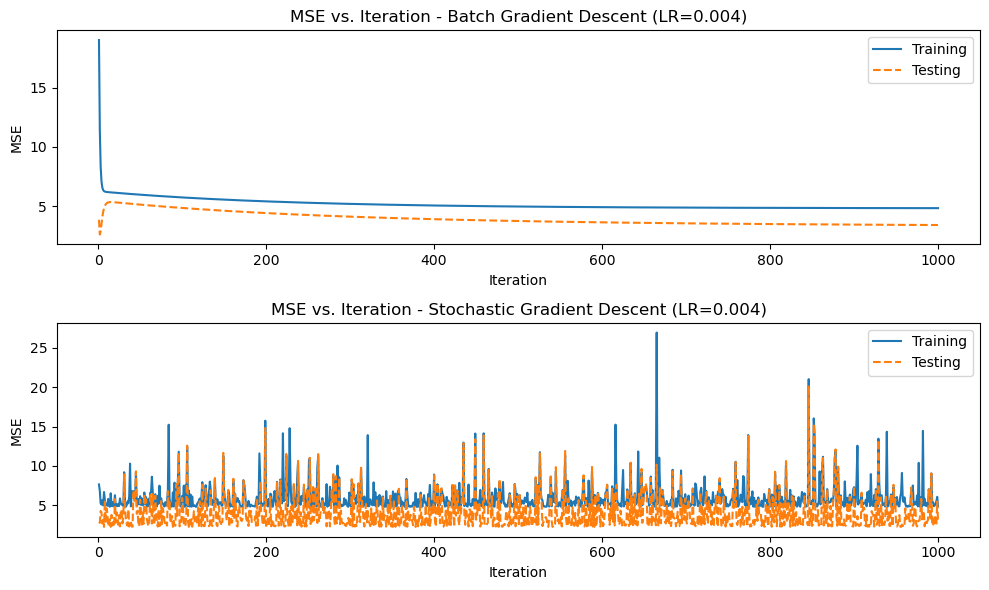

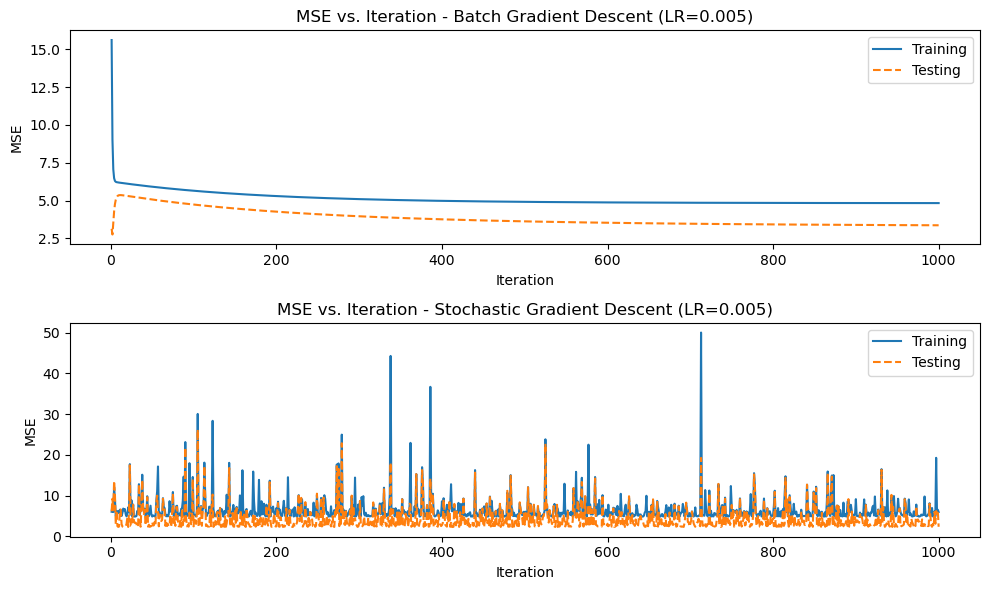

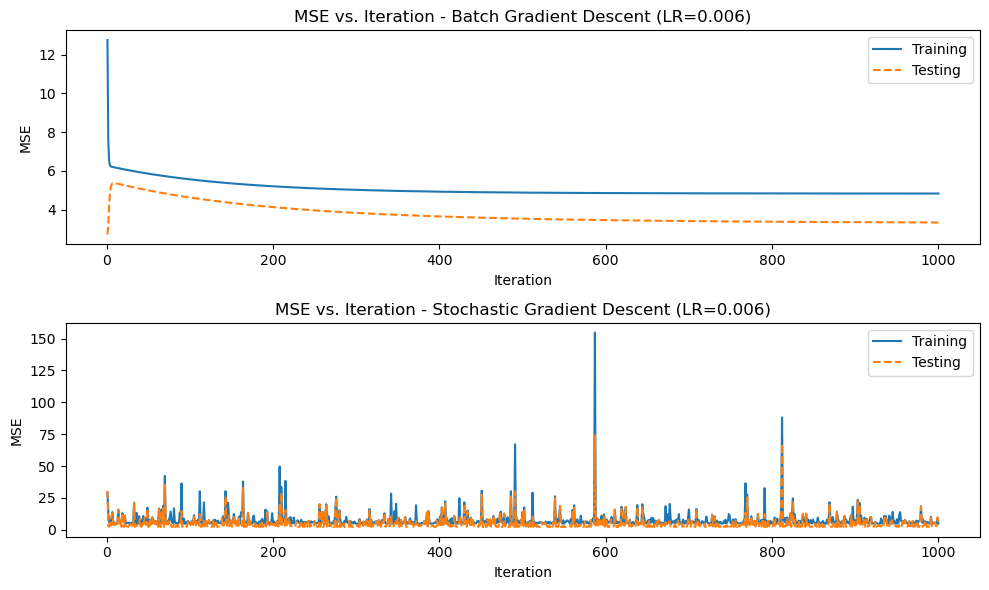

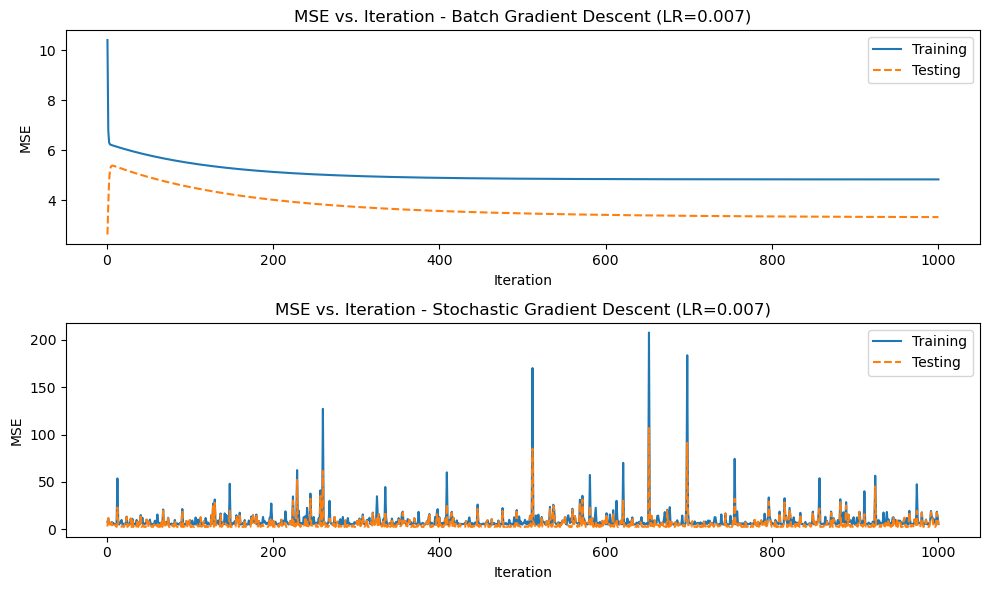

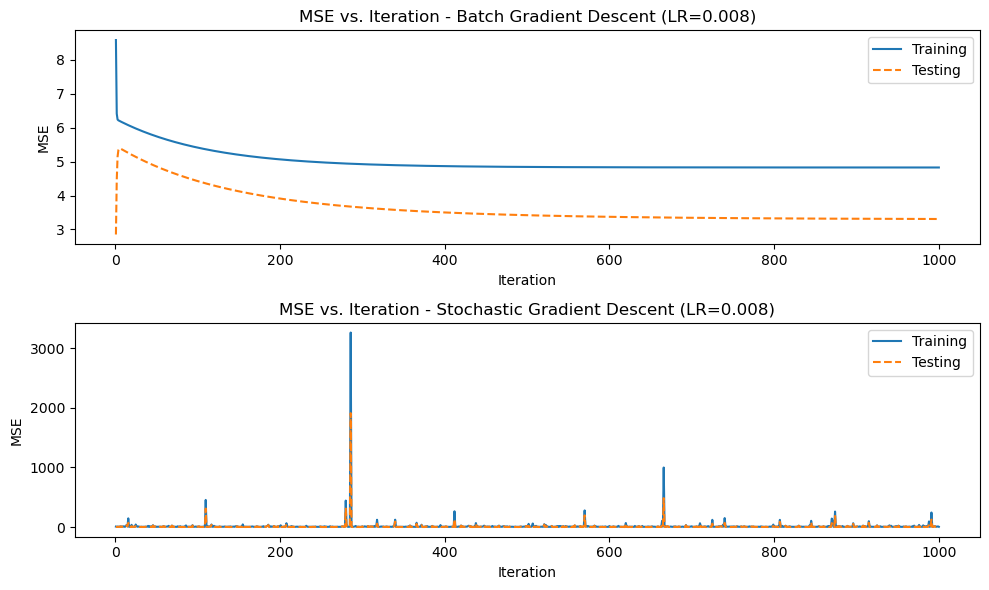

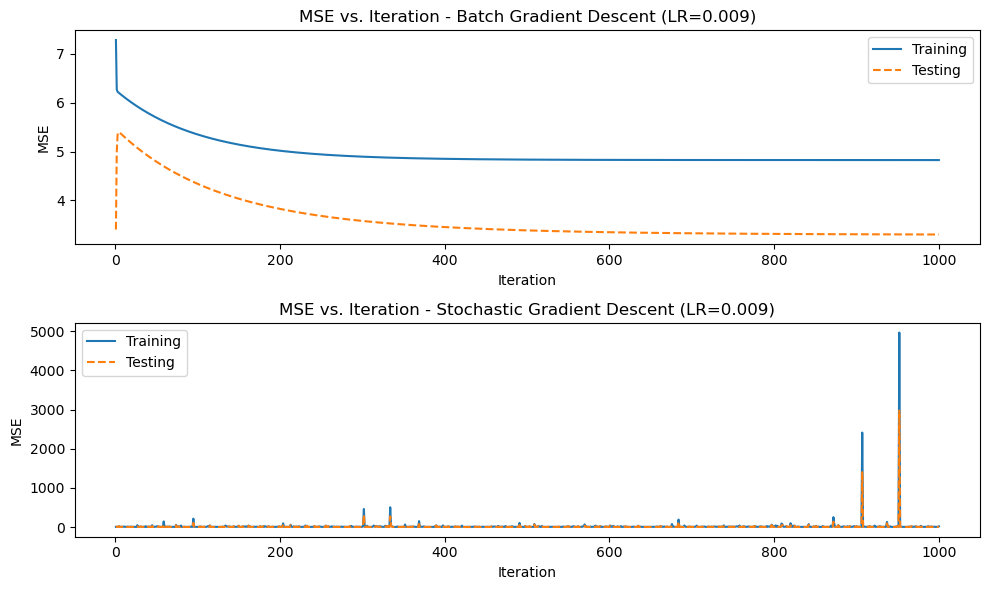

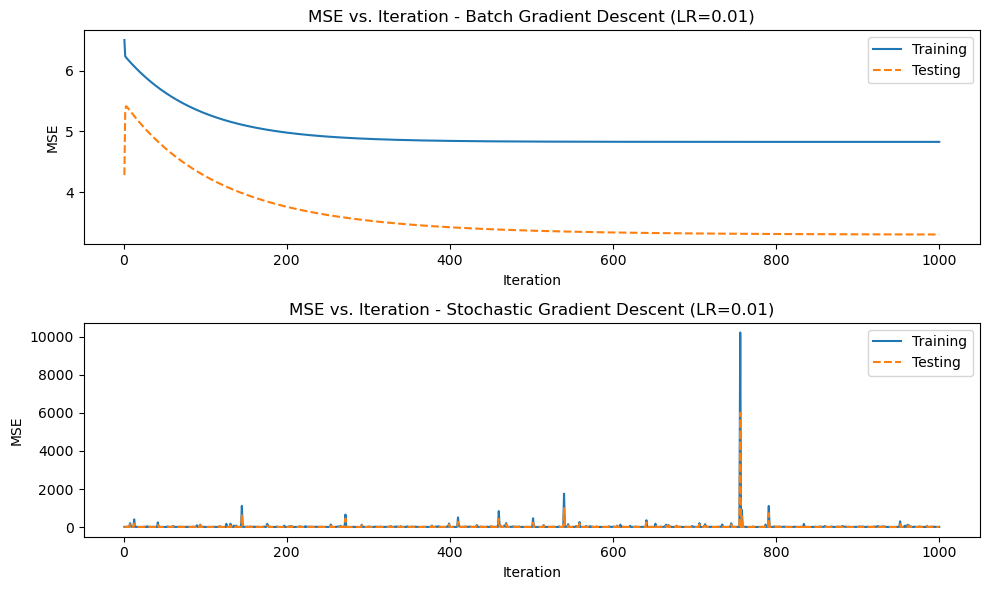

In [7]:
# Plot MSE vs. iteration for batch and stochastic modes for training and testing sets
num_iterations = 1000

# Plot MSE for different learning rates in separate images
for lr in learning_rates:
    plt.figure(figsize=(10, 6))

    # Batch Gradient Descent
    plt.subplot(2, 1, 1)
    plt.title(f'MSE vs. Iteration - Batch Gradient Descent (LR={lr})')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    theta_initial = np.zeros(x_train.shape[1])
    theta, mse_history_train, mse_history_test = gradient_descent_batch(x_train, y_train, x_test, y_test, theta_initial, lr, num_iterations)
    plt.plot(range(1, num_iterations + 1), mse_history_train, label='Training')
    plt.plot(range(1, num_iterations + 1), mse_history_test, linestyle='--', label='Testing')
    plt.legend()

    # Stochastic Gradient Descent
    plt.subplot(2, 1, 2)
    plt.title(f'MSE vs. Iteration - Stochastic Gradient Descent (LR={lr})')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    theta_initial = np.zeros(x_train.shape[1])
    theta, mse_history_train, mse_history_test = gradient_descent_stochastic(x_train, y_train, x_test, y_test, theta_initial, lr, num_iterations)
    plt.plot(range(1, num_iterations + 1), mse_history_train, label='Training')
    plt.plot(range(1, num_iterations + 1), mse_history_test, linestyle='--', label='Testing')
    plt.legend()

    plt.tight_layout()
    plt.show()


Discussion: From MSE vs. Iteration - Batch graph, we can see that even changing Learning rate, graph is approximatily same.
For MSE vs. Iteration - Stochastic Gradient graph, we can say that there is no change in the MSE values as even if we increse or decrease number of iteration

c) Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006,

0.007, 0.008, 0.009, 0.01) and determine the best learning rate.

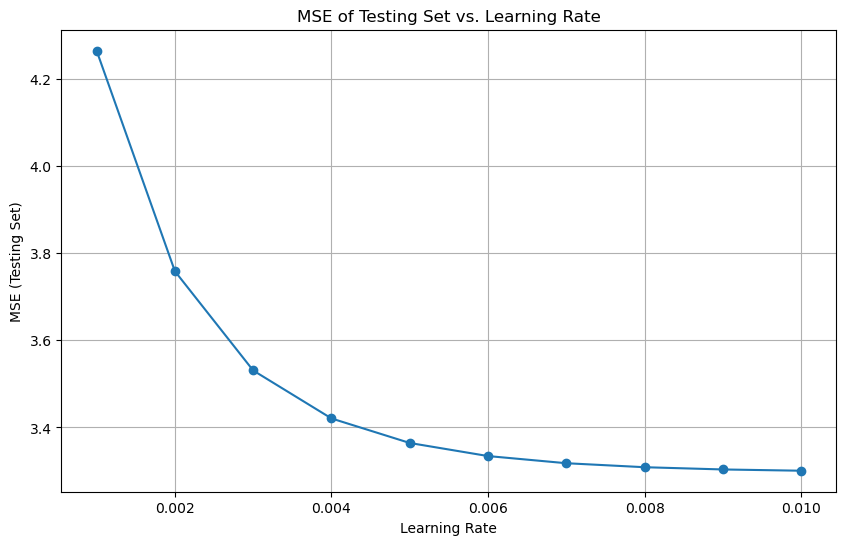

In [8]:
# Modify the gradient_descent_batch function to accept learning_rate and num_iterations
def gradient_descent_batch(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    mse_history = []

    for i in range(num_iterations):
        predictions = np.dot(x, theta)
        error = predictions - y
        gradient = np.dot(x.T, error) / m
        theta -= learning_rate * gradient

        mse = calculate_mse(theta, x, y)
        mse_history.append(mse)

    return theta, mse_history


# Learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Plot MSE of the testing set vs. learning rate
mse_testing = []

for lr in learning_rates:
    theta_initial = np.zeros(x_train.shape[1])
    theta, _ = gradient_descent_batch(x_train, y_train, theta_initial, lr, num_iterations)
    mse = calculate_mse(theta, x_test, y_test)
    mse_testing.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mse_testing, marker='o')
plt.title('MSE of Testing Set vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('MSE (Testing Set)')
plt.grid(True)
plt.show()


Discussion:
As we can see from graph that as Learning rate increasing, MSE (Mean Square Error) is decreasing and at learning_rate = 0.01 is MSE is minimum.
Therefore the best learning rate is at 0.01